<h1 align=center><font size = 6>Food Classification with Tensorflow Hub</font></h1>

<br>

<img src="https://i.ytimg.com/vi/yjprpOoH5c8/maxresdefault.jpg" height=450 width=1000 alt="tensorflow.org">

<small>Picture Source:<a href="https://www.tensorflow.org/"> TensorFlow</a></small>

<br>

<h2>About TensorFlow Hub</h2>
<p>TensorFlow Hub is an open repository and library for reusable machine learning. The tfhub. dev repository provides many pre-trained models: text embeddings, image classification models, TF. js/TFLite models and much more.  The repository is open to community contributors.</p>

<br>

<h2>Source</h2>
<p>For more detailed information, you can take a look at  
<a href="https://www.tensorflow.org/hub/overview#:~:text=TensorFlow%20Hub%20is%20an%20open,is%20open%20to%20community%20contributors.">TensorFlow Hub website</a>. All these informations refered from TensorFlow Hub and <a href="https://www.deeplearning.ai/">DeepLearning.AI</a>.</p>

<br>

<h2>Objective:</h2>
<ul>
  <li>Explore the Tensorflow Hub for object detection models.</li>
  <li>Load the models in your workspace.</li>
  <li>Preprocess an image for inference.</li>
  <li>Run inference on the models and inspect the output.</li>
</ul>

<br>

<h2>License</h2>
<p>This model follows the <b>Apache 2.0 license</b>. If you intend to use it beyond permissable usage, please consult with the model owners ahead of time.</p>

<br>

<h2>Keywords</h2>
<ul>
  <li>Computer Science</li>
  <li>Classification</li>
  <li>TensorFlow Hub</li>
  <li>Neural Networks</li>
  <li>Desserts</li>
  <li>TensorFlow v2</li>
</ul>
<br>

<h2>Objective for this Notebook</h2>

<p>This lab will walk you through how to use object detection models available in <a href="(https://www.tensorflow.org/hub">Tensorflow Hub</a>. This project was created to provide information on how to add and use the pre-trained food classification model through TensorFlow Hub. In the following sections, you will:</p>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="https://#import">Import Libraries</a></li>
<li><a href="https://#import_hub">Download the Model from Tensorflow Hub</a></li>
<li><a href="https://#build_function">Build Function for Detector</a></li>
<li><a href="https://#run_inference">Run Inference on the Image</a></li>
<br>

<p></p>
Estimated Time Needed: <strong>15 min</strong>
</div>

In [1]:
# Install this package to use Colab's GPU for training
!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 3 not upgraded.
Need to get 420 MB of archives.
After this operation, 1,622 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.4.1.50-1+cuda11.6 [420 MB]
Fetched 420 MB in 10s (42.8 MB/s)
(Reading database ... 123991 files and directories currently installed.)
Removing libcudnn8-dev (8.1.1.33-1+cuda11.2) ...
update-alternatives: removing manually selected alternative - switching libcudnn to auto mode
(Reading database ... 123968 files and directories currently installed.)
Prepari

<br>
<h2 align=center id="import">Import Libraries</h2>
<p>The following are the libraries we are going to use for this lab:</p>

In [2]:
# TF2 version
import tensorflow.compat.v2 as tf
import tensorflow_hub as hub

In [3]:
from PIL import Image
from PIL import ImageOps
from skimage import io
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import requests

<br>
<h2 align=center id="import_hub">Download the Model from Tensorflow Hub</h2>

<p>TensorFlow Hub is a repository of trained machine learning models which you can reuse in your own projects. You can select a model to see more information about it and copy the URL so you can download it to your workspace. <i>All you need to do is click <b>Copy URL</b> on Food Classification TensorFlow Hub website.</i></p>

<br>

<img src="https://raw.githubusercontent.com/doguilmak/Food-Classification-with-TensorFlow-Hub/main/tf_hub.png" height=300 width=1000 alt="tensorflow.org">
<small>Picture Source:<a href="https://tfhub.dev/google/aiy/vision/classifier/food_V1/1"> aiy/vision/classifier/food_V1</a></small>

<br>

<ul>
  <li>You can see the domains covered <a href="https://tfhub.dev/">here</a> and its subcategories. </li>
  <li>For this lab, you will want to look at the <a href="https://tfhub.dev/s?module-type=image-object-detection">image object detection subcategory</a>. </li>
  <li>We selected <a href="https://arxiv.org/abs/1704.04861">MobileNet V1</a> model architecture. We used <a href="https://tfhub.dev/google/aiy/vision/classifier/food_V1/1">pre-trained food classificaton model</a> via Hub.</li>
</ul>

<br>

<h3>Published by</h3>
<p><b>Google</b></p>

<br>

<h3>Overview</h3>

<p>This model is trained to recognize <i>2023</i> food dishes from images. It is based on <i>MobileNet V1</i>.</p>

<br>

<h3>Input</h3>

<p>This model takes images as input. Inputs are expected to be 3-channel RGB color images of size <b><i>224 x 224</i></b>, scaled to [0, 1].</p>

<br>

<h3>Output</h3>
<p>This model outputs to <code>image_classifier</code>.

<code>image_classifier</code>: A probability vector of dimension 2024, corresponding to a background class and one of <i>2023</i> food dishes in the labelmap.</p>

<br>

<h3>Known limitations</h3>
<p>This model assumes that its input image contains a well-cropped food dish. If a non-food image is input to the model or if the dish is not well-cropped, the output of the model may be meaningless.
This model was trained on a dataset skewed toward <b>North American foods</b>.</p>

In [4]:
# MobileNet V1
module_handle = "https://tfhub.dev/google/aiy/vision/classifier/food_V1/1"
labelmap_url = "https://www.gstatic.com/aihub/tfhub/labelmaps/aiy_food_V1_labelmap.csv"

<h3>Load the model</h3>

<p>Next, you'll load the model specified by the <code>module_handle</code>.</p>

In [5]:
m = hub.KerasLayer(module_handle)

In [6]:
model = hub.load(module_handle)

<h3>Choose the default signature</h3>

Some models in the Tensorflow hub can be used for different tasks. So each model's documentation should show what *signature* to use when running the model. 

In [7]:
# take a look at the available signatures for this particular model
model.signatures.keys()

KeysView(_SignatureMap({'image_classifier': <ConcreteFunction pruned(images) at 0x7F4F8C2E8850>, 'default': <ConcreteFunction pruned(images) at 0x7F4F8C1BC510>}))

<p>If you want to see if a model has more than one signature then you can do something like <code>print(hub.load(module_handle).signatures.keys())</code>. In your case, the models you will be using only have the default signature so you don't have to worry about other types.</p>

In [8]:
print(hub.load(module_handle).signatures.keys())

KeysView(_SignatureMap({'default': <ConcreteFunction pruned(images) at 0x7F4F8C15D290>, 'image_classifier': <ConcreteFunction pruned(images) at 0x7F4F75796490>}))


Please choose the 'default' signature for your object detector.
- For object detection models, its 'default' signature will accept a batch of image tensors and output a dictionary describing the objects detected, which is what you'll want here.

<p>Let's take a look at our classes in pre-trained model from the hub. This model contains 2023 different kind of meals.</p>

In [9]:
classes = list(pd.read_csv(labelmap_url)["name"])
len(classes)

2024

In [10]:
classes[0:10]

['__background__',
 'Chaudin',
 'Bambalouni',
 'Ghoriba',
 'Mango sticky rice',
 'Jianbing',
 'Aguachile',
 'Carrozza',
 'Miyan kuka',
 'Efo riro']

<br>
<h2 align=center id="build_function">Build Function for Detector</h2>

This function will take in the object detection model <code>m</code> and the path to a sample image, then use this model to detect objects and display its predicted class categories and detection boxes.

<ul>
<li><code>run_detector</code> uses <code>image_url</code> to converts the image and makes predictions.</li>
</ul>

In [11]:
input_shape = (224, 224)

def run_detector(image_url):
  
  im = Image.open(requests.get(image_url, stream=True).raw)
  plt.figure(figsize=(15, 15))
  plt.imshow(im)
  plt.show()

  image = np.asarray(io.imread(image_url), dtype="float")
  image = cv2.resize(image, dsize=input_shape, interpolation=cv2.INTER_CUBIC)
  
  # Scale values to [0, 1].
  image = image / image.max()
  
  # The model expects an input of (?, 224, 224, 3).
  images = np.expand_dims(image, 0)
  
  # This assumes you're using TF2.
  output = m(images)
  predicted_index = output.numpy().argmax()
  classes = list(pd.read_csv(labelmap_url)["name"])
  print(f"Prediction: {classes[predicted_index]}")
  
  max_value = np.max(output.numpy())
  print(f"Probability: {max_value}")

<br>
<h2 align=center id="run_inference">Run Inference on the Image</h2>

<p>You can run your detector by calling the <code>run_detector</code> function. This will print the number of objects found followed by three lists: </p>

<ul>
  <li>The detection scores of each object found (i.e. how confident the model is)</li> 
  <li>The classes of each object found.</li>
  <li>The bounding boxes of each object.</li>
</ul>

In [12]:
cake_url = "https://www.inspiredtaste.net/wp-content/uploads/2022/11/Easy-Fudgy-Brownies-Recipe-2-1200.jpg"

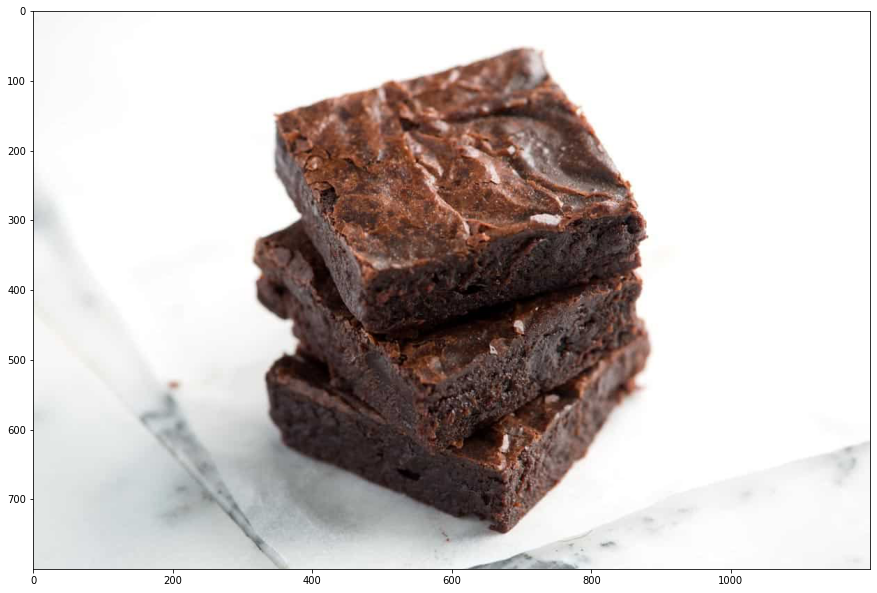

Prediction: Chocolate brownie
Probability: 0.6123600006103516


In [13]:
run_detector(cake_url)

<h1>Contact Me</h1>
<p>If you have something to say to me please contact me:</p>

<ul>
  <li>Twitter: <a href="https://twitter.com/Doguilmak">Doguilmak</a></li>
  <li>Mail address: doguilmak@gmail.com</li>
</ul>

In [14]:
from datetime import datetime
print(f"Changes have been made to the project on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Changes have been made to the project on 2022-11-19 23:27:58
